In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures



/var/folders/yt/kpjs1sb134xbh0gd8yy86l5r0000gn/T/ipykernel_22658/2180895694.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
##read the house data 
df = pd.read_csv('data/house-data.csv')

In [3]:
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
##check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [7]:

##print statistics of numerical columns
print(df.describe())


                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [8]:
# Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'])

In [9]:
# Remove unnecessary columns if any
df = df.drop(['id'], axis=1)

In [10]:
corr_matrix = df.corr()
print(corr_matrix)

                   date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date           1.000000 -0.004357 -0.016800  -0.034410    -0.034559  0.006313   
price         -0.004357  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms      -0.016800  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms     -0.034410  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.034559  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot       0.006313  0.089661  0.031703   0.087740     0.172826  1.000000   
floors        -0.022491  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront     0.001356  0.266369 -0.006582   0.063744     0.103818  0.021604   
view          -0.001800  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.050769  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade         -0.039912  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.027924  0.6

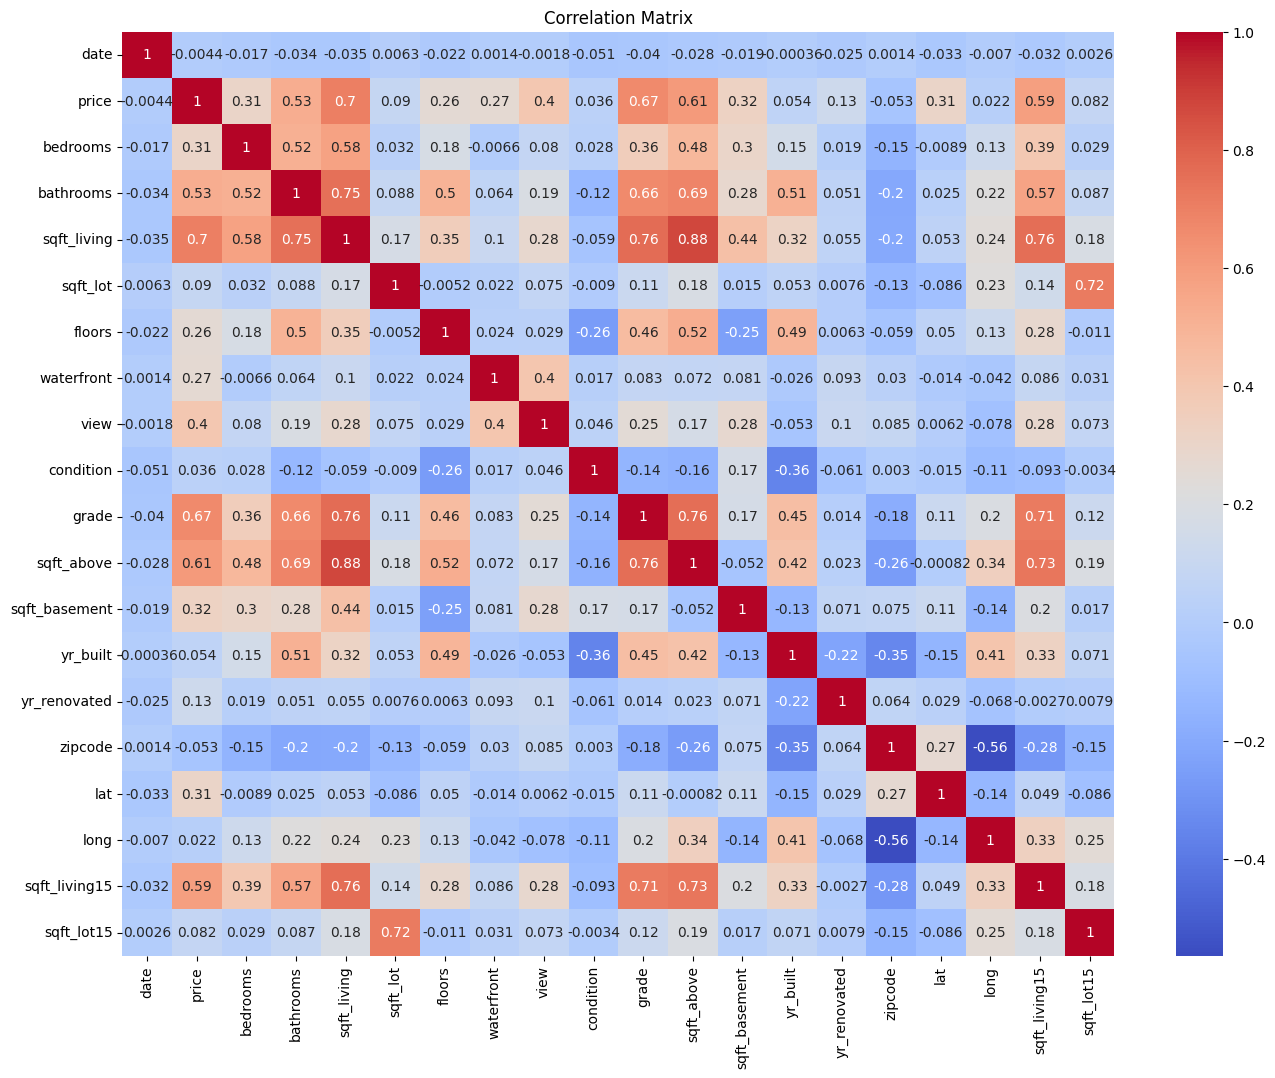

In [11]:

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


By looking at the Correlation matrix we get some important info about which variables are correlated: 

Price: Price has a high correlation with sqft_living (0.7), grade(0.67), sqft_above(0.61), sqft_living15(0.57)
This indicates that the larger and higher graded the house is, the higher the asking price is 


Sqft_living: this has a high correlation with bathrooms(0.75), sqft_above(0.88), and grade (0.76)
indicating that the bigger the house is, the more bathrooms there are, and the living space at the higher levels are bigger 

These are positive correlations, but it is interesting to see negative correlations also.
For example yr_built and yr_renovated has a negative correlation which indicates that the older houses are the ones renovated. 

In [12]:
#Let us check the correlation of the features with the target variable price

threshold = 0.2

low_corr_with_price = corr_matrix['price'][abs(corr_matrix['price']) < threshold].index.tolist()


In [13]:
# Drop the least informative attributes
df_reduced = df.drop(low_corr_with_price, axis=1)

In [14]:
print(df_reduced.head())

      price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0  221900.0         3       1.00         1180     1.0           0     0   
1  538000.0         3       2.25         2570     2.0           0     0   
2  180000.0         2       1.00          770     1.0           0     0   
3  604000.0         4       3.00         1960     1.0           0     0   
4  510000.0         3       2.00         1680     1.0           0     0   

   grade  sqft_above  sqft_basement      lat  sqft_living15  
0      7        1180              0  47.5112           1340  
1      7        2170            400  47.7210           1690  
2      6         770              0  47.7379           2720  
3      7        1050            910  47.5208           1360  
4      8        1680              0  47.6168           1800  


In [15]:



# Here we're using the .drop() method to drop the 'price' column from the dataframe.
# We're also using the axis=1 parameter to specify that we want to drop a column, not a row.
# The reason we're doing this is because we want to use all the other columns as our features.

X = df_reduced.drop('price', axis=1)  # X is all columns except 'price', which are our features.

# Here we're using the 'price' column as our target variable.
y = df_reduced['price']  # y is just the 'price' column, which is what we're trying to predict.

# Now, we'll split these into training and testing sets.
# Our testing set will be 20% of the data, and our training set will be 80% of the data.
# random_state=42 is just a way to ensure that you get the same split every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# Lets try to fit a linear regression model to the data

X_sqft_living = df[['sqft_living']]  


# Split the data into training and testing sets

X_train_sqft, X_test_sqft, y_train, y_test = train_test_split(X_sqft_living, y, test_size=0.2, random_state=42)

# Create a Linear Regression model

linear_reg_sqft = LinearRegression()
linear_reg_sqft.fit(X_train_sqft, y_train)

LinearRegression()

In [17]:
# Make predictions using the testing set

y_pred_sqft = linear_reg_sqft.predict(X_test_sqft)
rmse_sqft = root_mean_squared_error(y_test, y_pred_sqft)
r2_sqft = r2_score(y_test, y_pred_sqft)

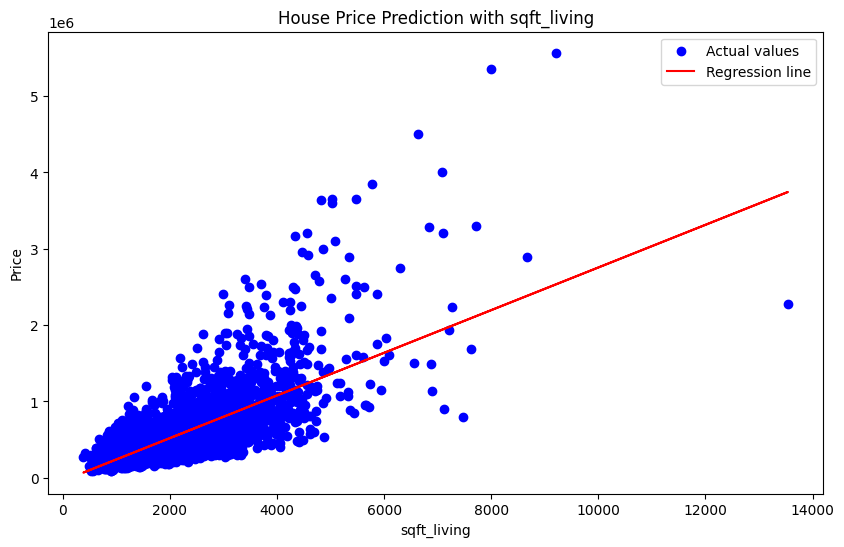

In [18]:
# Create a visual representation of the model

plt.figure(figsize=(10, 6))
plt.scatter(X_test_sqft, y_test, color='blue', label='Actual values')
plt.plot(X_test_sqft, y_pred_sqft, color='red', label='Regression line')
plt.title('House Price Prediction with sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.legend()
plt.show()

This plot visualisation illustrates tha there are a positive correlation between the living area (sqft_living) and the house price indicating that the bigger the house gets, thus more expensive it is. 

The spread of the values to the regression line indicates that the sqft for houses is a signifacant predictor of house prices, though the higher we go on the regression line we see som outliers that may suggest that there is other factors that may influence the price. Data that we aren't considering when only looking at the sqft and price- 

After reducing the dataset for variables that has the least correlation with our target value, we can now apply PCA to get our dataset ready for multiple linear regression. 
PCA helps us reduce the dimensionality of the dataset so that we can capture the most important features that contributes to the target variable.



In [19]:
# We will start out with standardizing the data


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.decomposition import PCA

# Here we are setting the n_components to 0.95 which means that pca will retain 95% of the variance in the original data.
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

num_components = pca.n_components_
print("Number of PCA components:", num_components)

Number of PCA components: 8


We will now be able to take the PCA data and used it for multiple linear regressions. 
The reason for this is 
because the PCA transformation applied to the dataset, where multiple principlal components is used as features for the model, the regression is multiple.
Remember that the target element is the price

In [21]:
# Create a LinearRegression object
linear_reg = LinearRegression()

In [22]:
# Train the model using the training sets
linear_reg.fit(X_train_pca, y_train)

LinearRegression()

In [23]:
# And now we can make predictions on the testing set

y_pred_pca = linear_reg.predict(X_test_pca)

In [24]:
# Its important to now evaluate the model by checking the mean squared error and the R2 score to evaluate the model performance


rmse_pca = root_mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

In [25]:
# Now we can print the RMSE and R2 score to see how well our model performed

print("PCA Linear Regression RMSE:", rmse_pca)
print("PCA Linear Regression R²:", r2_pca)

PCA Linear Regression RMSE: 230827.6848876893
PCA Linear Regression R²: 0.6475553720199797


After applying linear regression model to our dataset that is PCA transformed, we obtained an RMSE of approx. 231 and a R² score of 0.648.
These results indicates that on average this models predictions deviate from the actual house pricing by around 231. 
The models R² value indicates that this model can explain about 64.8% of the variance of the house pricing. 

Even though this may not be an ideal result, given the fact that the complexity of house pricing that can be influenced by numerous factors that our dataset doesnt fully cover, this result is actually an ok result. 


Lets now try to create a polynomial regression model


In [26]:
X = df[['sqft_living']] 
y = df['price']

In [27]:
# Lets create a polynomial feature object with degree 2

degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [28]:
# Now we split the data into training and testing sets

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [29]:
# And now its time to train the model

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
# Time for predictions and calculating the RMSE and R2 score

y_pred_poly = poly_reg_model.predict(X_test_poly)
rmse_poly = root_mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)


In [31]:
# Now we can print the RMSE and R2 score to see how well our model performed

print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R²:", r2_poly)

Polynomial Regression RMSE: 286555.28468978626
Polynomial Regression R²: 0.45683478653690457


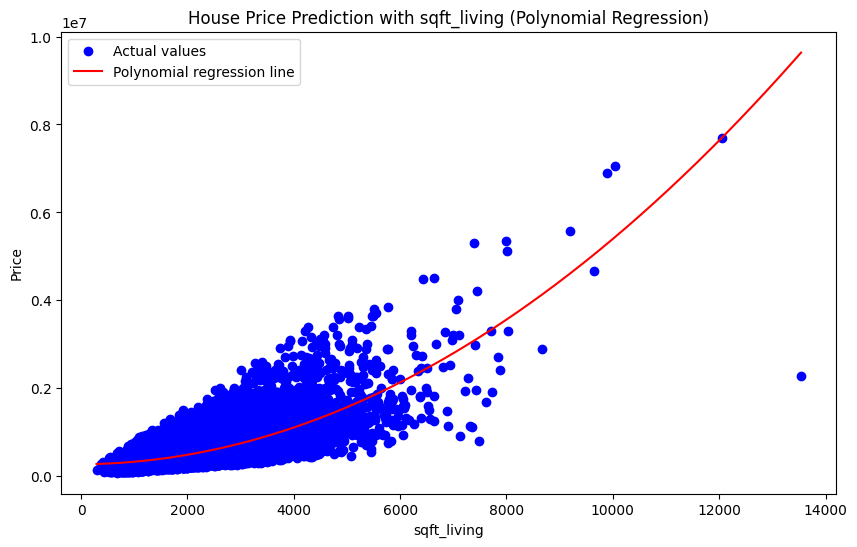

In [32]:
# Let us visualize the results

x_values = np.linspace(df['sqft_living'].min(), df['sqft_living'].max(), 400).reshape(-1, 1)

# Converting x_values to a DataFrame with the same structure as house_data
x_values_df = pd.DataFrame(x_values, columns=['sqft_living'])

x_values_poly = poly_features.transform(x_values_df)


y_values_pred = poly_reg_model.predict(x_values_poly)

# Finally, plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], color='blue', label='Actual values')
plt.plot(x_values, y_values_pred, color='red', label='Polynomial regression line')
plt.title('House Price Prediction with sqft_living (Polynomial Regression)')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.legend()
plt.show()


The polynomial regression model actually shows a worse result than the models used earlier. 
With RMSE on 286555.28468978626 and R²: 0.45683478653690457 it is lower than the earlier models 